In [9]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, cross_validate, KFold, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from datetime import date
import holidays
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier
from matplotlib import pyplot as plt
import joblib


In [10]:
# Load the dataset
# Note: Replace 'your_dataset.csv' with the actual path to your dataset
df = pd.read_csv('ADM_Merged_Final_Fuad.csv')


C:\Users\90544\AppData\Local\Temp\ipykernel_13844\2814010723.py:3: DtypeWarning: Columns (5,8,9,10,11,12,14,15,17,18,20,21,23,24,30,31,32,34) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('ADM_Merged_Final_Fuad.csv')


In [11]:
# Veri kümesinin görüntüle
df

,CBS ID,ŞEBEKE UNSURU TİPİ,c kolonu,yıl,ID,Cinsi,Primer Gerilim,Sekonder Gerilim,Il,Ilçe,...,KENTALTI OG (9C),KENTALTI AG (9D),KIRSAL OG (9E),KIRSAL AG (9F),KENTSEL OG(10A)=(9A)X(8),KENTSEL AG(10B)=(9B)X(8),KENTALTI OG(10C)=(9C)X(8),KENTALTI AG(10D)=(9D)X(8),KIRSAL OG(10E)=(9E)X(8),KIRSAL AG(10F)=(9F)X(8)
0,1821519,Şalter,2182516_1,2023,1.821519e+06,GENLEŞME DEPOLU,31500.0,400.0,Denizli,Tavas,...,0,0,0,0,0.0,20.654444,0.0,0.0,0.0,0.000000
1,1821526,Şalter,1990951_1,2023,1.821526e+06,GENLEŞME DEPOLU,31500.0,400.0,Denizli,Acıpayam,...,0,0,0,223,0.0,0.000000,0.0,0.0,0.0,390.250000
2,1821526,Şalter,1994619_1,2023,1.821526e+06,GENLEŞME DEPOLU,31500.0,400.0,Denizli,Acıpayam,...,0,0,0,223,0.0,0.000000,0.0,0.0,0.0,260.290556
3,1821527,Şalter,2169787_1,2023,1.821527e+06,HERMETİK,15800.0,400.0,Denizli,Buldan,...,0,0,0,28,0.0,0.000000,0.0,0.0,0.0,74.814444
4,1821527,Şalter,2195836_1,2023,1.821527e+06,HERMETİK,15800.0,400.0,Denizli,Buldan,...,0,0,0,28,0.0,0.000000,0.0,0.0,0.0,91.544444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85882,9206461808,Kofra,2266464_1,2023,9.206462e+09,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0.0,24.659444,0.0,0.0,0.0,0.000000
85883,9206507101,Kofra,2135012_1,2023,9.206507e+09,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0.0,2.472222,0.0,0.0,0.0,0.000000
85884,9206576408,Kofra,2167476_1,2023,9.206576e+09,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0.0,32.213333,0.0,0.0,0.0,0.000000
85885,9206644522,Kofra,2259874_1,2023,9.206645e+09,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0.0,3.031667,0.0,0.0,0.0,0.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85887 entries, 0 to 85886
Data columns (total 61 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   CBS ID                                  85887 non-null  int64  
 1   ŞEBEKE UNSURU TİPİ                      85887 non-null  object 
 2   c kolonu                                85887 non-null  object 
 3   yıl                                     85887 non-null  int64  
 4   ID                                      73010 non-null  float64
 5   Cinsi                                   41236 non-null  object 
 6   Primer Gerilim                          5741 non-null   float64
 7   Sekonder Gerilim                        5741 non-null   float64
 8   Il                                      60850 non-null  object 
 9   Ilçe                                    60850 non-null  object 
 10  Mahalle                                 60850 non-null  ob

In [15]:
# boş verileri döndür
df.isnull()


,CBS ID,ŞEBEKE UNSURU TİPİ,c kolonu,yıl,ID,Cinsi,Primer Gerilim,Sekonder Gerilim,Il,Ilçe,...,KENTALTI OG (9C),KENTALTI AG (9D),KIRSAL OG (9E),KIRSAL AG (9F),KENTSEL OG(10A)=(9A)X(8),KENTSEL AG(10B)=(9B)X(8),KENTALTI OG(10C)=(9C)X(8),KENTALTI AG(10D)=(9D)X(8),KIRSAL OG(10E)=(9E)X(8),KIRSAL AG(10F)=(9F)X(8)
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85882,False,False,False,False,False,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
85883,False,False,False,False,False,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
85884,False,False,False,False,False,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
85885,False,False,False,False,False,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False


In [16]:
#tüm boş kolonları al ve listeye dönüştür 
null_columns = df.columns[df.isnull().all()].tolist()
print("Number of full-null columns:", len(null_columns))

Number of full-null columns: 2


In [17]:
#tümü boş olan satırların indexlerini bulma
null_rows = df.index[df.isnull().all(axis=1)].tolist()
print("Number of full-null rows:", len(null_rows))

Number of full-null rows: 0


In [18]:
#sayısal (numerical) sütunları tanımla
numerical_columns = df.select_dtypes(include=['number']).columns

In [19]:
numerical_columns #Sayısal sütunların isimlerini gösterme

Index(['CBS ID', 'yıl', 'ID', 'Primer Gerilim', 'Sekonder Gerilim', 'Gücü',
       'Agirlik', 'Işletme Gerilimi', 'TURU_ID_ADI', 'ANMA_GERILIMI_ID_ADI',
       'ANMA_AKIMI_ID_ADI', 'Imal Yili', 'Anma Gerilimi',
       'Kisa Devre Dayanim  Akimi', 'STATIONID', 'KADEME (2)',
       'KESİNTİ SÜRESİ (SAAT) (8)=(7)-(6)', 'KENTSEL OG (9A)',
       'KENTSEL AG (9B)', 'KENTALTI OG (9C)', 'KENTALTI AG (9D)',
       'KIRSAL   OG (9E)', 'KIRSAL    AG (9F)', ' KENTSEL OG(10A)=(9A)X(8)',
       'KENTSEL AG(10B)=(9B)X(8)', 'KENTALTI OG(10C)=(9C)X(8)',
       'KENTALTI AG(10D)=(9D)X(8)', 'KIRSAL OG(10E)=(9E)X(8)',
       'KIRSAL AG(10F)=(9F)X(8)'],
      dtype='object')

In [24]:
#obect ve category tipindeki kolonları al 
categorical_columns = df.select_dtypes(include=['object','category']).columns

In [25]:
categorical_columns

Index(['ŞEBEKE UNSURU TİPİ', 'c kolonu', 'Cinsi', 'Il', 'Ilçe', 'Mahalle',
       'Tipi', 'Seri No', 'Uk', 'İmal Yılı', 'Marka', 'Türü', 'Anma Akımı',
       'GIS_ID', 'CINSI_ID_ADI', 'TIP_ID_ADI', 'Tip', 'Anma Kd Kesme Akimi',
       'Seri ID', 'ZONETYPE', 'KESİNTİNİN KODU (1)', 'İL (3A)', 'İLÇE (3B)',
       'ŞEBEKE UNSURU TİPİ (3C)', 'ŞEBEKE UNSURU KODU (3D)',
       'KESİNTİ NEDENİNE İLİŞKİN AÇIKLAMA (4)', 'KAYNAĞA GÖRE (5A)',
       'SÜREYE GÖRE (5B)', 'SEBEBE GÖRE (5C)', 'BİLDİRİME GÖRE (5D)',
       'KESİNTİ BAŞLAMA TARİHİ VE ZAMANI (6)',
       'KESİNTİ SONA ERME TARİHİ VE ZAMANI (7)'],
      dtype='object')

In [29]:
#tamamen eksik verisi olan sutunları kaldır
df = df.dropna(axis=1, how='all')

In [32]:
columns_to_drop = ["c kolonu","Imal Yili","Tip","Türü","yıl","Anma Akımı"," KENTSEL OG(10A)=(9A)X(8)",
                   "KENTSEL AG(10B)=(9B)X(8)","KENTALTI OG(10C)=(9C)X(8)",
                   "KENTALTI AG(10D)=(9D)X(8)","KIRSAL OG(10E)=(9E)X(8)",
                   "KIRSAL AG(10F)=(9F)X(8)","KESİNTİ NEDENİNE İLİŞKİN AÇIKLAMA (4)",
                   "ŞEBEKE UNSURU KODU (3D)","ID","SÜREYE GÖRE (5B)",
                   "KAYNAĞA GÖRE (5A)","SEBEBE GÖRE (5C)","Seri No","Seri ID","Uk",
                   "Agirlik","Primer Gerilim", "Sekonder Gerilim","Gücü",
                   "GIS_ID","Il","Ilçe","CINSI_ID_ADI","TIP_ID_ADI","ANMA_GERILIMI_ID_ADI"]

df = df.drop(columns=columns_to_drop)


In [35]:
#imal yılı bilinmiyor olanları al ve kaldır
df = df[df['İmal Yılı'] != 'Bilinmiyor']

In [37]:
df['İmal Yılı']

0        1992
1        1993
2        1993
3        2011
4        2011
         ... 
85882     NaN
85883     NaN
85884     NaN
85885     NaN
85886     NaN
Name: İmal Yılı, Length: 85850, dtype: object

In [38]:
# 'İmal Yılı'nın 0 olduğu satırları filtreleyin
rows_with_zero = df[df['İmal Yılı'] == 0]

zero_count = (df['İmal Yılı'] == 0).sum()

zero_count 

np.int64(3952)

In [39]:
#imal yılı sütunundaki verileri sayısal değere dönüştürür
df['İmal Yılı'] = pd.to_numeric(df['İmal Yılı'], errors='coerce').astype('Int64')


In [40]:
# 0 olan imal değerlerini nan değreiyle değiştirme
df.loc[df['İmal Yılı'] == 0, 'İmal Yılı'] = np.nan

In [50]:
tarihler = pd.DataFrame(columns=["başlama", "bitiş"])# Boş bir DataFrame oluştur ve sütun isimlerini belirleme
# 'KESİNTİ BAŞLAMA TARİHİ VE ZAMANI (6)' sütunundaki tarih verilerini datetime formatına dönüştür ve 'başlama' sütununa ata
tarihler['başlama'] = pd.to_datetime(df["KESİNTİ BAŞLAMA TARİHİ VE ZAMANI (6)"], format='%d.%m.%Y %H:%M:%S')
# 'KESİNTİ SONA ERME TARİHİ VE ZAMANI (7)' sütunundaki tarih verilerini datetime formatına dönüştür ve 'bitiş' sütununa ata
tarihler["bitiş"] = pd.to_datetime(df["KESİNTİ SONA ERME TARİHİ VE ZAMANI (7)"], format='%d.%m.%Y %H:%M:%S')


In [51]:
# 'başlama' sütunundaki datetime verilerinden sadece tarih kısmını al ve 'Tarih' sütununa ata
df['Tarih'] = tarihler['başlama'].dt.date 
# 'başlama' sütunundaki datetime verilerinden sadece zaman kısmını al ve 'Zaman' sütununa ata
df['Zaman'] = tarihler['başlama'].dt.time

In [52]:
df['Tarih'] 

0        2023-10-05
1        2023-01-02
2        2023-01-11
3        2023-09-13
4        2023-10-21
            ...    
85882    2023-12-31
85883    2023-08-04
85884    2023-09-05
85885    2023-12-18
85886    2023-09-23
Name: Tarih, Length: 85850, dtype: object

In [53]:
df['Zaman'] 

0        10:00:00
1        16:30:25
2        12:25:50
3        13:00:00
4        10:00:00
           ...   
85882    19:58:52
85883    13:14:27
85884    12:43:09
85885    15:46:14
85886    09:39:07
Name: Zaman, Length: 85850, dtype: object

In [54]:
tr_holidays = holidays.TR() # Türkiye'nin resmi tatillerini içeren bir nesne oluşturma

In [55]:
# Tatil, ay ve gün bilgilerini saklamak için boş listeler oluşturma
holidays = []
months = []
days = []
for i in range(0,len(df)):  
    holidays.append(tr_holidays.get(df.iloc[i]["Tarih"]))#'Tarih' sütunundaki tarih için tatil ismini bul ve 'holidays' listesine ekle
    months.append(df.iloc[i]["Tarih"].strftime("%B")) #'Tarih' sütunundaki tarihin ay adını bul ve 'months' listesine ekle
    days.append(df.iloc[i]["Tarih"].strftime("%A")) #'Tarih' sütunundaki tarihin gün adını bul ve 'days' listesine ekle

In [57]:
print(df["KESİNTİ BAŞLAMA TARİHİ VE ZAMANI (6)"].head(10))


0    05.10.2023 10:00:00
1    02.01.2023 16:30:25
2    11.01.2023 12:25:50
3    13.09.2023 13:00:00
4    21.10.2023 10:00:00
5    20.06.2023 09:30:00
6    19.12.2023 09:00:00
7    28.09.2023 14:00:00
8    05.12.2023 11:55:00
9    26.04.2023 10:00:00
Name: KESİNTİ BAŞLAMA TARİHİ VE ZAMANI (6), dtype: object


In [58]:
# 'KESİNTİ BAŞLAMA TARİHİ VE ZAMANI (6)' sütunundaki tarih-zaman verilerini datetime formatına çevirmr
# Tarih formatını '%d.%m.%Y %H:%M:%S' olarak belirtme
# Sadece saat bilgisini alıp 'KESİNTİ BAŞLAMA TARİHİ VE ZAMANI (6)_Hour' adlı yeni bir sütuna ekleme
df['KESİNTİ BAŞLAMA TARİHİ VE ZAMANI (6)_Hour'] = pd.to_datetime(
    df["KESİNTİ BAŞLAMA TARİHİ VE ZAMANI (6)"], 
    format="%d.%m.%Y %H:%M:%S"
).dt.hour


In [63]:
sure = []
for i in range(0,len(tarihler)):
    duration = tarihler["bitiş"].iloc[i] - tarihler["başlama"].iloc[i]# 'bitiş' ile 'başlama' arasındaki farkı hesapla (datetime farkı)
    sure.append(int(duration.total_seconds()/60))#farkı saniye cinsinden al ve dakikaya çevir, ardından tamsayıya dönüştür

In [64]:
df.loc[:,"Kesinti Süresi"] = sure#sure listesindeki süreleri Kesinti Süresi adında yeni bir sütun olarak df'ye ekle

In [68]:
df = df.drop(["KESİNTİ SÜRESİ (SAAT) (8)=(7)-(6)","Cinsi","Anma Kd Kesme Akimi","CBS ID","KESİNTİ SONA ERME TARİHİ VE ZAMANI (7)","KESİNTİ BAŞLAMA TARİHİ VE ZAMANI (6)","tatil","Tarih","Zaman" ], axis=1)
                             

In [69]:
# Dizini sıfırla ve eski dizini bırak
df = df.reset_index(drop=True)

# Güncellenen DataFrame bilgilerini yazdır
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85850 entries, 0 to 85849
Data columns (total 26 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ŞEBEKE UNSURU TİPİ                         85850 non-null  object 
 1   Mahalle                                    60813 non-null  object 
 2   Tipi                                       33726 non-null  object 
 3   İmal Yılı                                  85850 non-null  Int64  
 4   Marka                                      26550 non-null  object 
 5   Işletme Gerilimi                           37440 non-null  float64
 6   Anma Gerilimi                              33636 non-null  float64
 7   Kisa Devre Dayanim  Akimi                  30732 non-null  object 
 8   STATIONID                                  22729 non-null  float64
 9   ZONETYPE                                   22729 non-null  object 
 10  KESİNTİNİN KODU (1)   

In [73]:
y = df["Kesinti Süresi"]
y

0        309
1        105
2         70
3        160
4        196
        ... 
85845    105
85846    148
85847    241
85848    181
85849     44
Name: Kesinti Süresi, Length: 85850, dtype: int64

In [80]:
# Reset index and drop the old index
df = df.reset_index(drop=True)

# Print updated DataFrame information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85850 entries, 0 to 85849
Data columns (total 24 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ŞEBEKE UNSURU TİPİ                         85850 non-null  object 
 1   Mahalle                                    60813 non-null  object 
 2   İmal Yılı                                  85850 non-null  Int64  
 3   Marka                                      26550 non-null  object 
 4   Işletme Gerilimi                           37440 non-null  float64
 5   Anma Gerilimi                              33636 non-null  float64
 6   Kisa Devre Dayanim  Akimi                  30732 non-null  object 
 7   STATIONID                                  22729 non-null  float64
 8   ZONETYPE                                   22729 non-null  object 
 9   KESİNTİNİN KODU (1)                        85850 non-null  object 
 10  KADEME (2)            

In [81]:
df=df.drop(["STATIONID", "ZONETYPE"], axis=1)

In [83]:
df = df.dropna()

In [85]:
df.columns = df.columns.str.replace(r'\s+', '_', regex=True)  # Sütun adlarındaki birden fazla boşluğu tek bir alt çizgi (_) ile değiştir
df.columns = df.columns.str.replace(r'[()]+', '', regex=True) # Sütun adlarındaki parantezleri (hem '(' hem de ')') kaldır
df.columns = df.columns.str.replace(r'_+', '_', regex=True)   # Sütun adlarındaki birden fazla alt çizgiyi tek bir alt çizgi (_) ile değiştir

In [88]:
numerical_columns = df.select_dtypes(include=[np.number]).columns# Sayısal veri türlerine sahip sütunları seç
numerical_columns 

Index(['İmal_Yılı', 'Işletme_Gerilimi', 'Anma_Gerilimi', 'KADEME_2',
       'KENTSEL_OG_9A', 'KENTSEL_AG_9B', 'KENTALTI_OG_9C', 'KENTALTI_AG_9D',
       'KIRSAL_OG_9E', 'KIRSAL_AG_9F',
       'KESİNTİ_BAŞLAMA_TARİHİ_VE_ZAMANI_6_Hour', 'Kesinti_Süresi'],
      dtype='object')

In [99]:
df = df[df['Marka'] != '0']# 'Marka' sütununda değeri '0' olan satırları çıkar

In [100]:
df = df.dropna()

In [102]:
# 'Kesinti_Süresi' sütunundaki her bir değeri kontrol et ve belirli aralıklara göre sınıflandır
new_y = []
for i in df["Kesinti_Süresi"]:
    if i <= 45: 
        new_y.append(0.0)# Eğer süre 45 dakikadan küçük veya eşitse, 0.0 ekle
    elif i <= 120: 
        new_y.append(1.0)
    elif i <= 240: 
        new_y.append(2.0)
    else:  
        new_y.append(3.0)


<Axes: xlabel='0'>

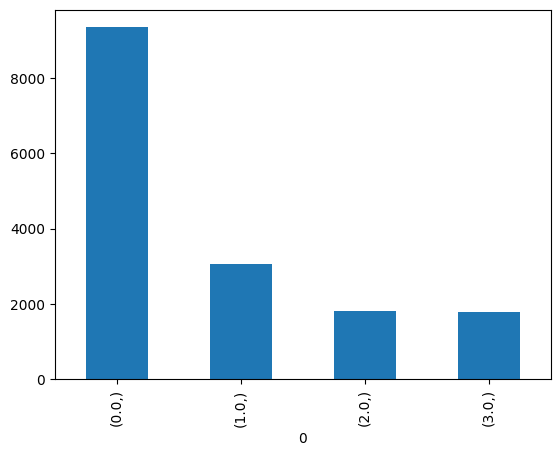

In [103]:
pd.DataFrame(new_y).value_counts().plot(kind="bar")

In [108]:
df = pd.get_dummies(df, columns=categorical_columns) # 'categorical_columns' listesindeki kategorik sütunlar için one-hot encoding uygula

In [109]:
column_names=df.columns.tolist()

column_df=pd.DataFrame(column_names,columns=['Column Names'])# Sütun isimlerini içeren bir DataFrame oluştur

column_df.to_csv('column_names.csv',index=False)# Oluşturulan DataFrame'i 'column_names.csv' dosyasına kaydet

In [116]:
len(new_y)


16001

In [117]:
# df ve new_y verilerini %10 test seti olarak ayır ve geri kalanını eğitim seti olarak kullan
X_train, X_test, y_train, y_test = train_test_split(df, new_y, test_size=0.10, random_state=84)

In [118]:
X_train

,İmal_Yılı,Işletme_Gerilimi,Anma_Gerilimi,KADEME_2,KENTSEL_OG_9A,KENTSEL_AG_9B,KENTALTI_OG_9C,KENTALTI_AG_9D,KIRSAL_OG_9E,KIRSAL_AG_9F,...,ay_November,ay_October,ay_September,gun_Friday,gun_Monday,gun_Saturday,gun_Sunday,gun_Thursday,gun_Tuesday,gun_Wednesday
2441,2003,31500.0,36000.0,1,16,2785,0,0,0,0,...,False,False,False,False,False,False,False,False,False,True
9793,1996,31500.0,36000.0,1,0,0,0,0,0,70,...,False,False,False,False,True,False,False,False,False,False
3780,2000,31500.0,36000.0,1,4,498,0,0,0,0,...,False,False,False,False,False,True,False,False,False,False
3093,1998,15800.0,36000.0,1,49,1802,0,0,0,0,...,False,False,True,False,False,False,False,False,True,False
11571,2006,31500.0,3600.0,1,0,0,3,175,0,0,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4597,2000,31500.0,36000.0,1,17,1154,0,0,0,0,...,False,False,False,False,True,False,False,False,False,False
3384,1994,31500.0,36000.0,1,10,853,0,0,0,51,...,True,False,False,False,False,False,True,False,False,False
13145,1985,154000.0,31500.0,1,79,291,0,0,0,0,...,False,False,True,False,False,True,False,False,False,False
12017,2003,31500.0,3600.0,1,0,947,0,0,0,0,...,False,False,True,False,True,False,False,False,False,False


In [119]:
 X_test

,İmal_Yılı,Işletme_Gerilimi,Anma_Gerilimi,KADEME_2,KENTSEL_OG_9A,KENTSEL_AG_9B,KENTALTI_OG_9C,KENTALTI_AG_9D,KIRSAL_OG_9E,KIRSAL_AG_9F,...,ay_November,ay_October,ay_September,gun_Friday,gun_Monday,gun_Saturday,gun_Sunday,gun_Thursday,gun_Tuesday,gun_Wednesday
10493,1998,31500.0,36000.0,1,111,7924,0,0,0,0,...,False,False,False,False,False,False,False,False,False,True
5695,2002,31500.0,36000.0,1,0,0,0,0,5,412,...,False,False,False,False,False,False,True,False,False,False
6876,2002,31500.0,36000.0,1,0,0,0,0,1,300,...,True,False,False,False,False,False,True,False,False,False
2224,1996,15800.0,17000.0,1,31,6509,0,0,0,0,...,False,False,False,False,False,False,False,False,False,True
6188,2011,31500.0,36000.0,1,0,112,0,0,0,0,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,2006,31500.0,36000.0,1,0,46,0,0,0,368,...,False,False,False,True,False,False,False,False,False,False
753,1994,31500.0,36000.0,1,6,175,0,17,0,0,...,False,False,False,False,True,False,False,False,False,False
2490,1994,31500.0,36000.0,1,0,0,0,21,4,421,...,False,False,False,False,False,True,False,False,False,False
3577,2000,31500.0,36000.0,1,5,165,0,0,0,0,...,False,False,False,False,True,False,False,False,False,False


In [120]:
 y_train

[0.0,
 2.0,
 0.0,
 0.0,
 0.0,
 2.0,
 3.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 2.0,
 0.0,
 2.0,
 3.0,
 0.0,
 2.0,
 0.0,
 2.0,
 1.0,
 1.0,
 0.0,
 0.0,
 2.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 2.0,
 1.0,
 2.0,
 1.0,
 2.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 2.0,
 2.0,
 0.0,
 2.0,
 1.0,
 0.0,
 0.0,
 2.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 3.0,
 3.0,
 1.0,
 0.0,
 3.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 2.0,
 1.0,
 0.0,
 2.0,
 1.0,
 0.0,
 1.0,
 0.0,
 2.0,
 1.0,
 0.0,
 2.0,
 0.0,
 0.0,
 1.0,
 1.0,
 3.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 2.0,
 1.0,
 3.0,
 0.0,
 0.0,
 1.0,
 2.0,
 0.0,
 2.0,
 0.0,
 1.0,
 0.0,
 1.0,
 3.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 3.0,
 0.0,
 1.0,
 0.0,
 0.0,
 2.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 3.0,
 0.0,
 2.0,
 1.0,
 0.0,
 3.0,
 1.0,
 0.0,
 3.0,
 3.0,
 0.0,
 0.0,
 3.0,
 0.0,
 1.0,
 0.0,
 0.0,
 3.0,
 0.0,
 2.0,
 1.0,
 0.0,
 1.0,
 0.0,
 2.0

In [121]:
y_test

[1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 2.0,
 0.0,
 0.0,
 0.0,
 3.0,
 0.0,
 3.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 3.0,
 1.0,
 0.0,
 0.0,
 0.0,
 3.0,
 0.0,
 0.0,
 2.0,
 0.0,
 1.0,
 3.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 3.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 3.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 3.0,
 0.0,
 1.0,
 0.0,
 1.0,
 2.0,
 1.0,
 0.0,
 2.0,
 0.0,
 1.0,
 0.0,
 0.0,
 3.0,
 3.0,
 2.0,
 1.0,
 2.0,
 0.0,
 0.0,
 2.0,
 0.0,
 0.0,
 2.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 3.0,
 0.0,
 3.0,
 1.0,
 2.0,
 0.0,
 2.0,
 1.0,
 2.0,
 0.0,
 1.0,
 0.0,
 2.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 2.0,
 2.0,
 2.0,
 3.0,
 0.0,
 0.0,
 0.0,
 0.0,
 2.0,
 1.0,
 0.0,
 1.0,
 2.0,
 1.0,
 0.0,
 3.0,
 0.0,
 0.0,
 2.0,
 0.0,
 1.0,
 0.0,
 3.0,
 0.0,
 3.0,
 0.0,
 1.0,
 0.0,
 3.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 2.0,
 3.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0

In [122]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14400 entries, 2441 to 6058
Columns: 1114 entries, İmal_Yılı to gun_Wednesday
dtypes: Int64(1), bool(1103), float64(2), int32(1), int64(7)
memory usage: 16.4 MB


In [123]:
list(X_test)

['İmal_Yılı',
 'Işletme_Gerilimi',
 'Anma_Gerilimi',
 'KADEME_2',
 'KENTSEL_OG_9A',
 'KENTSEL_AG_9B',
 'KENTALTI_OG_9C',
 'KENTALTI_AG_9D',
 'KIRSAL_OG_9E',
 'KIRSAL_AG_9F',
 'KESİNTİ_BAŞLAMA_TARİHİ_VE_ZAMANI_6_Hour',
 'ŞEBEKE_UNSURU_TİPİ_Ayırıcı',
 'ŞEBEKE_UNSURU_TİPİ_Kesici',
 'Mahalle_ Yeniköy Mh.',
 'Mahalle_1200 Evler Mh.',
 'Mahalle_15 Mayıs Mh.',
 'Mahalle_Abak Mh.',
 'Mahalle_Acarlar Mh.',
 'Mahalle_Adaköy Mh.',
 'Mahalle_Adalet Mh.',
 'Mahalle_Adamharmanı Mh.',
 'Mahalle_Adnan Menderes Mh.',
 'Mahalle_Adıgüzeller Mh.',
 'Mahalle_Ahmet Çavuş Hayıtlı Mh.',
 'Mahalle_Ahmetli Mh.',
 'Mahalle_Ahıllı Mh.',
 'Mahalle_Ak - Yeniköy Mh.',
 'Mahalle_Akalan Mh.',
 'Mahalle_Akarca Mh.',
 'Mahalle_Akbaş Mh.',
 'Mahalle_Akbük Mh.',
 'Mahalle_Akhan Mh.',
 'Mahalle_Akkaya Mh.',
 'Mahalle_Akkent Mh.',
 'Mahalle_Akkonak Mh.',
 'Mahalle_Akkovanlık Mh.',
 'Mahalle_Akköprü Mh.',
 'Mahalle_Akköy Mh.',
 'Mahalle_Akmescit Mh.',
 'Mahalle_Akpınar Mh.',
 'Mahalle_Aktepe Mh.',
 'Mahalle_Akyaka Mh.',
 'Ma

## KNN

In [114]:
#KNN=KNeighborsClassifier(n_neighbors=5, weights='distance', metric='minkowski')
# KNN modelini oluştur
KNN=KNeighborsClassifier()
# Modeli eğitim verisiyle eğit
model=KNN.fit(X_train, y_train) 
# Eğitim verisi üzerinde tahminler yap
y_pred = model.predict(X_train)
# Hedef sınıflar 
target_names = ['Kisa', 'Orta', 'Uzun', 'Cok Uzun']
# Eğitim verisi üzerindeki gerçek etiketlerle tahmin edilen etiketleri karşılaştır ve rapor oluşturma
print(classification_report(y_train, y_pred, target_names=target_names))


              precision    recall  f1-score   support

        Kisa       0.76      0.94      0.84      8356
        Orta       0.57      0.46      0.51      2781
        Uzun       0.53      0.31      0.39      1648
    Cok Uzun       0.63      0.38      0.48      1615

    accuracy                           0.71     14400
   macro avg       0.62      0.52      0.55     14400
weighted avg       0.68      0.71      0.68     14400



## XGBoost

In [125]:
import xgboost as xgb
# XGBoost sınıflandırıcı modelini oluştur
model = xgb.XGBClassifier()
# Modeli eğitim verisiyle eğit
model.fit(X_train, y_train)
# Test verisi üzerinde tahminler yap
y_pred = model.predict(X_test)
# Gerçek etiketlerle tahmin edilen etiketler arasındaki karşılaştırmayı yaparak karışıklık matrisini oluştur
cm = confusion_matrix(y_test, y_pred)

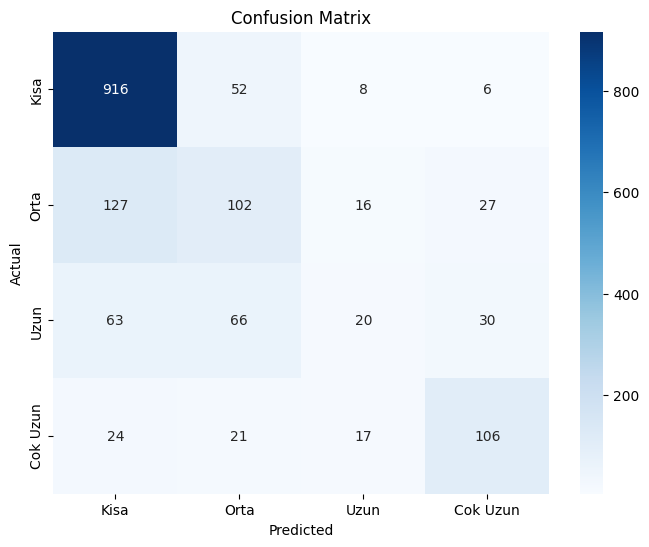

In [126]:
df_cm = pd.DataFrame(cm, index=['Kisa', 'Orta', 'Uzun','Cok Uzun'], 
                     columns=['Kisa', 'Orta', 'Uzun', 'Cok Uzun'])
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix')
sns.heatmap(df_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [127]:
y_pred = model.predict(df)# Burada, modelin eğitim ve test seti yerine tüm veri seti üzerinde tahmin yapıyor


target_names = ['Kisa', 'Orta', 'Uzun', 'Cok Uzun']
 
print(classification_report(new_y, y_pred, target_names=target_names, digits=2))

# Modeli oluşturup eğitme kısmı
model = xgb.XGBClassifier()# XGBoost sınıflandırıcısı oluşturma
model.fit(X_train, y_train)  # Eğitim verileriyle model eğitiliyor. (X_train, y_train)

# Modeli kaydetme
joblib.dump(model, "xgboost_model.pkl")
print("Model başarıyla kaydedildi.")

              precision    recall  f1-score   support

        Kisa       0.81      0.96      0.88      9338
        Orta       0.61      0.46      0.53      3053
        Uzun       0.76      0.34      0.47      1827
    Cok Uzun       0.74      0.76      0.75      1783

    accuracy                           0.77     16001
   macro avg       0.73      0.63      0.66     16001
weighted avg       0.76      0.77      0.75     16001

Model başarıyla kaydedildi.


## XGBoost 

In [121]:
y_pred = model.predict(X_test)

target_names = ['Kisa', 'Orta', 'Uzun','Cok Uzun']
 
print(classification_report(y_test, y_pred, target_names=target_names, digits=2)) 

              precision    recall  f1-score   support

        Kisa       0.81      0.93      0.87       982
        Orta       0.42      0.38      0.40       272
        Uzun       0.33      0.11      0.17       179
    Cok Uzun       0.63      0.63      0.63       168

    accuracy                           0.71      1601
   macro avg       0.55      0.51      0.52      1601
weighted avg       0.67      0.71      0.68      1601



In [122]:
joblib.dump(model, 'ADM-4-71-modelv1.joblib')

['ADM-4-71-modelv1.joblib']

## RandomForest

In [123]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

In [124]:
y_pred = model.predict(X_test)

target_names = ['Kisa', 'Orta', 'Uzun', 'Cok Uzun']
 
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

        Kisa       0.79      0.91      0.85       982
        Orta       0.39      0.29      0.33       272
        Uzun       0.41      0.20      0.27       179
    Cok Uzun       0.59      0.62      0.61       168

    accuracy                           0.70      1601
   macro avg       0.55      0.51      0.52      1601
weighted avg       0.66      0.70      0.67      1601



## Decision Tree

In [125]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test) 
cm = confusion_matrix(y_test, y_pred)

In [126]:
y_pred = model.predict(X_test)
 
target_names = ['Kisa', 'Orta', 'Uzun', 'Cok Uzun']
 
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

        Kisa       0.81      0.77      0.79       982
        Orta       0.27      0.32      0.30       272
        Uzun       0.29      0.26      0.27       179
    Cok Uzun       0.51      0.54      0.53       168

    accuracy                           0.61      1601
   macro avg       0.47      0.47      0.47      1601
weighted avg       0.63      0.61      0.62      1601



## Gradient Boost

Accuracy: 0.70
Confusion Matrix:
 [[930  34   3  15]
 [162  74   6  30]
 [ 87  50  12  30]
 [ 32  19   6 111]]


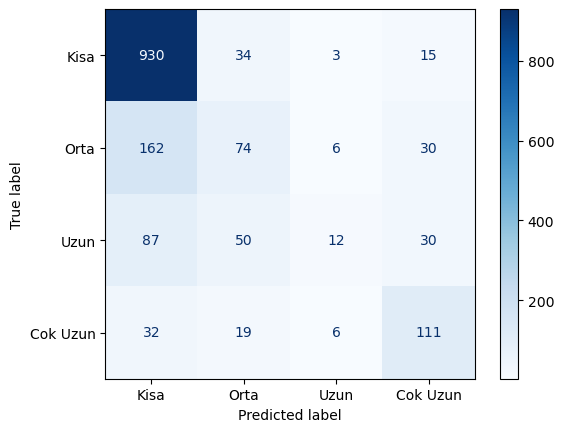

In [127]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbc.fit(X_train, y_train)

# Make predictions
y_pred = gbc.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap='Blues')


In [128]:
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

        Kisa       0.77      0.95      0.85       982
        Orta       0.42      0.27      0.33       272
        Uzun       0.44      0.07      0.12       179
    Cok Uzun       0.60      0.66      0.63       168

    accuracy                           0.70      1601
   macro avg       0.56      0.49      0.48      1601
weighted avg       0.65      0.70      0.66      1601



In [186]:
import streamlit as st
import pandas as pd
from datetime import datetime

# Load the dataset
# Note: Replace 'your_dataset.csv' with the actual path to your dataset
df = pd.read_csv('ADM_Merged_Final_Fuad.csv')


# Sütun adlarındaki boşlukları kaldır
df.columns = df.columns.str.strip()  

# Tarih sütununu tarih formatına dönüştürme
df['KESİNTİ BAŞLAMA TARİHİ VE ZAMANI (6)'] = pd.to_datetime(
    df['KESİNTİ BAŞLAMA TARİHİ VE ZAMANI (6)'],
    format='%d.%m.%Y %H:%M:%S',
    errors='coerce'
)

# Makine öğrenmesi sonuçları (sınıflar ve oranlar)
results = {
    'Kısa': {'precision': 0.77, 'recall': 0.95, 'f1_score': 0.85, 'support': 982},
    'Orta': {'precision': 0.42, 'recall': 0.27, 'f1_score': 0.33, 'support': 272},
    'Uzun': {'precision': 0.44, 'recall': 0.07, 'f1_score': 0.12, 'support': 179},
    'Çok Uzun': {'precision': 0.60, 'recall': 0.66, 'f1_score': 0.63, 'support': 168},
}

# Tahmin süreleri (dakika cinsinden)
tahmin_sureleri = {
    'Kısa': 30,
    'Orta': 60,
    'Uzun': 120,
    'Çok Uzun': 180,
}

# Streamlit uygulaması başlatma
st.title("Elektrik Kesintisi Bilgileri ve Tahminler")

# Ana sayfa (Veri görüntüleme)
st.subheader("Elektrik Kesintisi Verileri")

# Kullanıcıya tarih seçtirme
selected_date = st.date_input("Tarih Seçin", datetime.today())

# Tarihe göre filtreleme
filtrelenmis_veriler = df[df['KESİNTİ BAŞLAMA TARİHİ VE ZAMANI (6)'].dt.date == selected_date]
st.write(f"Seçilen Tarih: {selected_date}")
st.dataframe(filtrelenmis_veriler)

# Makine öğrenmesi sonuçları
st.subheader("Tahmin Sonuçları")

# Makine öğrenmesi sonuçlarını göster
for key, value in results.items():
    st.write(f"{key} Kesinti için Sonuçlar:")
    st.write(f"Precision: {value['precision']}, Recall: {value['recall']}, F1-Score: {value['f1_score']}, Support: {value['support']}")

# Elektrik kesintisi tahmin sürelerini hesaplamak
st.subheader("Kesinti Süresi Tahmin")

# Kullanıcıdan tarih ve saat bilgisi almak
tarih = st.date_input("Kesinti Başlangıç Tarihini Seçin", datetime.today())
saat = st.time_input("Kesinti Başlangıç Saatini Seçin", datetime.now().time())

# Kesinti zamanı
kesinti_tarihi_saat = pd.to_datetime(f"{tarih} {saat}")

# Kesinti süresi tahmini (en yüksek ihtimalle olan sınıf üzerinden)
tahmin_sinifi = 'Kısa'  # Örnek olarak 'Kısa' sınıfını kullanıyoruz.
tahmin_suresi = tahmin_sureleri[tahmin_sinifi]

# Kesinti bitiş tarihini hesapla
tahmin_bitis = kesinti_tarihi_saat + pd.Timedelta(minutes=tahmin_suresi)

st.write(f"Tahmin Edilen Kesinti Bitiş Zamanı: {tahmin_bitis}")

# Streamlit uygulamasını başlatmak için
if __name__ == '__main__':
    st.write("Uygulama Çalışıyor")


C:\Users\90544\AppData\Local\Temp\ipykernel_15732\2334359192.py:7: DtypeWarning: Columns (5,8,9,10,11,12,14,15,17,18,20,21,23,24,30,31,32,34) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('ADM_Merged_Final_Fuad.csv')
2024-12-09 14:29:02.065 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-09 14:29:02.386 
  command:

    streamlit run C:\Users\90544\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2024-12-09 14:29:02.387 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-09 14:29:02.388 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-09 14:29:02.389 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-09 14:29:02.390 Thread 'Mai

2024-12-09 14:29:02.625 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-09 14:29:02.628 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-09 14:29:02.638 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-09 14:29:02.641 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-09 14:29:02.642 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-09 14:29:02.644 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-09 14:29:02.646 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-09 14:29:02.648 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar